In [354]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

audio_file_path='datasets/drinking_2.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [355]:
print(librosa_audio_data)

[ 3.9842995e-04  9.6722004e-05  8.3976710e-04 ... -1.3657064e-03
 -1.8422189e-03  0.0000000e+00]


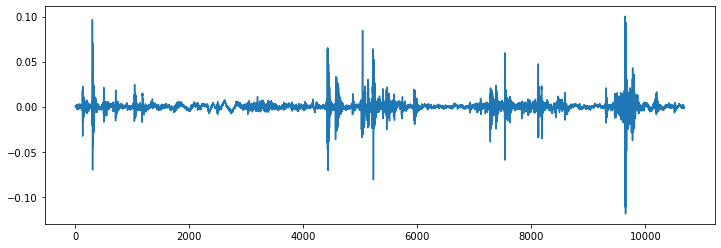

In [356]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [357]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [358]:
wave_audio

array([[  58,   -8],
       [   1,   -6],
       [   5,   15],
       ...,
       [ -10, -109],
       [  43, -105],
       [  36, -101]], dtype=int16)

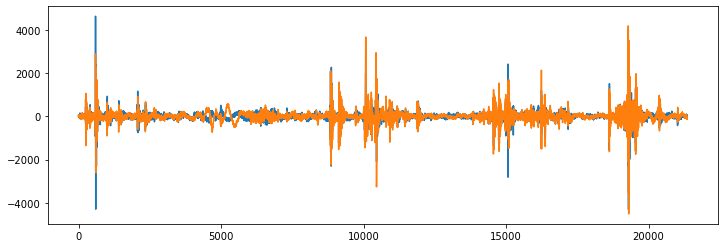

In [359]:
import matplotlib.pyplot as plt

# Original audio in stereo
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [360]:
# MFCC Extraction begin here 
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 21)


In [361]:
mfccs

array([[-3.36948334e+02, -3.09772766e+02, -3.51633453e+02,
        -3.95735138e+02, -4.26329132e+02, -4.16935181e+02,
        -3.91037994e+02, -3.96246857e+02, -3.46642792e+02,
        -2.70388611e+02, -2.59924072e+02, -2.96747864e+02,
        -3.94313110e+02, -4.03914886e+02, -3.29968506e+02,
        -2.97518921e+02, -3.01844116e+02, -3.50153442e+02,
        -2.95842224e+02, -2.56269440e+02, -3.24376678e+02],
       [-2.77668552e+01, -1.56258669e+01,  1.81101151e+01,
         4.08536606e+01,  5.45735550e+01,  4.99994926e+01,
         2.62772064e+01,  2.31380005e+01,  1.52458916e+01,
         6.65335388e+01,  1.10461258e+02,  1.03173096e+02,
         6.13016434e+01,  3.96889992e+01, -3.25895977e+00,
         7.59910297e+00,  5.07577324e+01,  4.80663605e+01,
        -1.08920326e+01, -1.57424669e+01, -3.06812215e+00],
       [-3.03922729e+01, -2.60005379e+01, -2.55652695e+01,
        -1.85084114e+01,  1.22776222e+01,  1.94835663e+01,
         1.12189102e+01,  1.51349068e+01, -1.11252613e

In [362]:
audio_dataset_path='datasets'
metadata=pd.read_csv('metadata.csv')
metadata.head(50)

,file_name,classID,class
0,drinking_1,1,drinking
1,drinking_2,1,drinking
2,drinking_3,1,drinking
3,drinking_4,1,drinking
4,drinking_5,1,drinking
5,drinking_6,1,drinking
6,drinking_7,1,drinking
7,drinking_8,1,drinking
8,drinking_9,1,drinking
9,drinking_10,1,drinking


In [363]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [364]:
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["file_name"]))
    print(file_name)

46it [00:00, 5125.47it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_1
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_2
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_3
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_4
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_5
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_6
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_7
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_8
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_9
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_10
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_11
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_12
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\a

In [365]:
# Loop for extracting
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["file_name"])+'.wav')
    print(file_name)
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

4it [00:00, 39.71it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_1.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_2.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_3.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_4.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_5.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_6.wav


8it [00:00, 21.26it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_7.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_8.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_9.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_10.wav


11it [00:00, 16.93it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_11.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_12.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_13.wav


15it [00:00, 15.37it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_14.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_15.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_16.wav


19it [00:01, 15.07it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_17.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_18.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_19.wav


21it [00:01, 14.02it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_20.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_21.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_22.wav


23it [00:01, 12.62it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_1.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_2.wav


25it [00:01, 11.04it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_3.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_4.wav


27it [00:01, 10.12it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_5.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_6.wav


29it [00:02,  9.73it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_7.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_8.wav


31it [00:02,  8.62it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_9.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_10.wav


34it [00:02,  9.18it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_11.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_12.wav


35it [00:02,  8.57it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_13.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_14.wav


37it [00:03,  7.55it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_15.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_16.wav


40it [00:03,  8.86it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_17.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_18.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_19.wav


42it [00:03,  8.95it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_20.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_21.wav


45it [00:04,  9.38it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_22.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_23.wav


46it [00:04, 10.98it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_24.wav


In [367]:
# converting extracted spectral features of drinking to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(50)

,feature,class
0,"[-328.13235, 65.59392, -38.67034, 5.4069195, -...",drinking
1,"[-349.1521, 42.501, -31.456572, 26.431646, -8....",drinking
2,"[-320.457, 63.11254, -37.251663, 11.011499, -7...",drinking
3,"[-372.14014, 41.927353, -35.56491, 37.086433, ...",drinking
4,"[-391.85886, 51.45333, -27.665045, 38.51123, -...",drinking
5,"[-393.057, 52.509537, -32.272507, 42.311592, -...",drinking
6,"[-369.73642, 54.400322, -21.231102, 18.65339, ...",drinking
7,"[-367.96658, 33.382534, -21.234934, 23.701822,...",drinking
8,"[-374.245, 40.232742, -26.485298, 29.021275, -...",drinking
9,"[-329.38553, 47.81891, -35.86021, 9.928306, -2...",drinking


In [368]:
# Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())
X.shape

(46, 40)

In [370]:
y

array(['drinking', 'drinking', 'drinking', 'drinking', 'drinking',
       'drinking', 'drinking', 'drinking', 'drinking', 'drinking',
       'drinking', 'drinking', 'drinking', 'drinking', 'drinking',
       'drinking', 'drinking', 'drinking', 'drinking', 'drinking',
       'drinking', 'drinking', 'eating', 'eating', 'eating', 'eating',
       'eating', 'eating', 'eating', 'eating', 'eating', 'eating',
       'eating', 'eating', 'eating', 'eating', 'eating', 'eating',
       'eating', 'eating', 'eating', 'eating', 'eating', 'eating',
       'eating', 'eating'], dtype='<U8')

In [329]:
### MODEL TRAINING from here onwards ###
!pip install tensorflow

In [371]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [372]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 

In [373]:
X_train

array([[-4.9770236e+02,  7.0039200e+01, -1.0797926e+01, ...,
         8.0093187e-01,  1.0071138e+00,  8.0542064e-01],
       [-4.7507056e+02,  9.0369804e+01, -5.6311278e+00, ...,
        -8.8141978e-02,  7.2443050e-01,  1.1776613e+00],
       [-4.5099399e+02,  8.3405350e+01, -1.7117874e+01, ...,
        -8.0003667e-01,  7.8147674e-01,  1.0357746e+00],
       ...,
       [-3.7214014e+02,  4.1927353e+01, -3.5564911e+01, ...,
        -2.4844568e+00, -1.3844047e+00, -2.1689005e+00],
       [-3.2813235e+02,  6.5593918e+01, -3.8670341e+01, ...,
        -8.6936939e-01, -9.8114926e-01,  1.3255457e+00],
       [-4.7582233e+02,  9.7280510e+01, -1.3610668e+01, ...,
        -3.2073024e-01,  6.5628505e-01, -3.1834713e-03]], dtype=float32)

In [374]:
X_train.shape

(36, 40)

In [375]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [376]:
y_train.shape

(36, 2)

In [336]:
import tensorflow as tf 
print(tf.__version__)

2.8.0


In [337]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [377]:
### No of classes
num_labels=y.shape[1]

In [339]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [340]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               4100      
                                                                 
 activation_16 (Activation)  (None, 100)               0         
                                                                 
 dropout_12 (Dropout)        (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 200)               20200     
                                                                 
 activation_17 (Activation)  (None, 200)               0         
                                                                 
 dropout_13 (Dropout)        (None, 200)               0         
                                                                 
 dense_18 (Dense)            (None, 100)              

In [378]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [379]:
# Trianing... 
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='models/drinking_rec.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
1/2 [==============>...............] - ETA: 0s - loss: 9.2510 - accuracy: 0.5000
Epoch 1: val_loss improved from inf to 0.62147, saving model to models\drinking_rec.hdf5
2/2 [==============================] - 1s 151ms/step - loss: 8.4584 - accuracy: 0.5278 - val_loss: 0.6215 - val_accuracy: 0.8000
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 10.0093 - accuracy: 0.4688
Epoch 2: val_loss did not improve from 0.62147
2/2 [==============================] - 0s 25ms/step - loss: 9.3600 - accuracy: 0.4444 - val_loss: 0.9373 - val_accuracy: 0.6000
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 3.8881 - accuracy: 0.5938
Epoch 3: val_loss did not improve from 0.62147
2/2 [==============================] - 0s 27ms/step - loss: 3.9640 - accuracy: 0.5556 - val_loss: 1.1027 - val_accuracy: 0.6000
Epoch 4/100
1/2 [==============>...............] - ETA: 0s - loss: 4.6521 - accuracy: 0.5000
Epoch 4: val_loss did not improve from 0.62147
2/2 [=======

Epoch 30/100
1/2 [==============>...............] - ETA: 0s - loss: 4.4904 - accuracy: 0.5938
Epoch 30: val_loss did not improve from 0.48043
2/2 [==============================] - 0s 22ms/step - loss: 4.4240 - accuracy: 0.6111 - val_loss: 0.4853 - val_accuracy: 0.9000
Epoch 31/100
1/2 [==============>...............] - ETA: 0s - loss: 5.1997 - accuracy: 0.5938
Epoch 31: val_loss improved from 0.48043 to 0.47098, saving model to models\drinking_rec.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 5.2722 - accuracy: 0.5833 - val_loss: 0.4710 - val_accuracy: 0.9000
Epoch 32/100
1/2 [==============>...............] - ETA: 0s - loss: 3.1780 - accuracy: 0.7500
Epoch 32: val_loss improved from 0.47098 to 0.45938, saving model to models\drinking_rec.hdf5
2/2 [==============================] - 0s 54ms/step - loss: 2.9964 - accuracy: 0.7500 - val_loss: 0.4594 - val_accuracy: 0.9000
Epoch 33/100
1/2 [==============>...............] - ETA: 0s - loss: 1.5792 - accuracy: 0.6875
Epoc

Epoch 59/100
1/2 [==============>...............] - ETA: 0s - loss: 2.5818 - accuracy: 0.6250
Epoch 59: val_loss did not improve from 0.41459
2/2 [==============================] - 0s 30ms/step - loss: 2.2971 - accuracy: 0.6667 - val_loss: 0.6363 - val_accuracy: 0.4000
Epoch 60/100
1/2 [==============>...............] - ETA: 0s - loss: 0.9718 - accuracy: 0.7500
Epoch 60: val_loss did not improve from 0.41459
2/2 [==============================] - 0s 25ms/step - loss: 1.1472 - accuracy: 0.7222 - val_loss: 0.5906 - val_accuracy: 0.6000
Epoch 61/100
1/2 [==============>...............] - ETA: 0s - loss: 1.5019 - accuracy: 0.7188
Epoch 61: val_loss did not improve from 0.41459
2/2 [==============================] - 0s 23ms/step - loss: 1.5371 - accuracy: 0.7222 - val_loss: 0.5582 - val_accuracy: 0.6000
Epoch 62/100
1/2 [==============>...............] - ETA: 0s - loss: 3.5791 - accuracy: 0.5000
Epoch 62: val_loss did not improve from 0.41459
2/2 [==============================] - 0s 24ms/s

Epoch 88/100
1/2 [==============>...............] - ETA: 0s - loss: 1.7765 - accuracy: 0.6562
Epoch 88: val_loss improved from 0.37360 to 0.37182, saving model to models\drinking_rec.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 1.6259 - accuracy: 0.6667 - val_loss: 0.3718 - val_accuracy: 0.9000
Epoch 89/100
1/2 [==============>...............] - ETA: 0s - loss: 1.4828 - accuracy: 0.6875
Epoch 89: val_loss did not improve from 0.37182
2/2 [==============================] - 0s 22ms/step - loss: 1.3473 - accuracy: 0.7222 - val_loss: 0.3740 - val_accuracy: 0.9000
Epoch 90/100
1/2 [==============>...............] - ETA: 0s - loss: 0.5786 - accuracy: 0.8125
Epoch 90: val_loss did not improve from 0.37182
2/2 [==============================] - 0s 24ms/step - loss: 0.5281 - accuracy: 0.8333 - val_loss: 0.3723 - val_accuracy: 0.9000
Epoch 91/100
1/2 [==============>...............] - ETA: 0s - loss: 1.4501 - accuracy: 0.7188
Epoch 91: val_loss improved from 0.37182 to 0.3701

In [380]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8999999761581421


In [346]:
import random
drink_or_eat = str(random.randint(0,1))
file_num = str(random.randint(1,22))
if drink_or_eat == '0': 
    string="drinking"
elif drink_or_eat == '1': 
    string ="eating"
testfile = string+"_"+file_num+".wav"
testfile

'drinking_12.wav'

File to be analyzed by the model: datasets/eating_8.wav 

Extracted spectral feature array: 

[-497.70236      70.0392      -10.797926      5.9000034    11.073314
   29.04538      -4.738904      8.711504      3.406808     15.42965
    3.8613627     6.1401577    -3.1233132     3.7212987    -1.3343382
    6.459551      1.7556803     7.822516      3.7667456     6.78143
    4.9455276     5.335523      2.9688394     2.2034297     1.6082627
    1.4819196     1.0818634     1.6060251     1.163806      2.3688314
    2.0013063     2.170983      2.459972      3.5992413     2.8587515
    1.75487       1.2256643     0.8009319     1.0071138     0.80542064]

Model outcome Label:  [[0 1]]

Final classified behavior: Eating


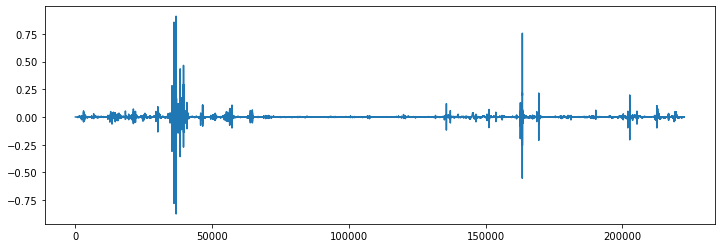

In [397]:
#Randomly select a file from validation set 
import random
drink_or_eat = str(random.randint(0,1))
file_num = str(random.randint(1,22))
if drink_or_eat == '0': 
    string="drinking"
elif drink_or_eat == '1': 
    string ="eating"
testfile = string+"_"+file_num+".wav"

#File to be analyzed
filename='datasets/'+testfile
print("File to be analyzed by the model: "+filename,"\n")

#Feeding the audio data into the model
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
librosa_audio_data,librosa_sample_rate=librosa.load(filename)
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

print("Extracted spectral feature array: \n")
print(mfccs_scaled_features)

mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
predicted_label=(model.predict(mfccs_scaled_features) > 0.5).astype("int32")
print("\nModel outcome Label: ", predicted_label)

#Interpreting the analyzed data from model 
if predicted_label[0][0] == 1: 
    final_behavior = "Drinking"
elif predicted_label[0][0] == 0: 
    final_behavior = "Eating"
print("\nFinal classified behavior: "+final_behavior)